In [26]:
import csv
import glob
import keras
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from keras.callbacks import TensorBoard
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.preprocessing.image import img_to_array
from matplotlib import image
from numpy import asarray
from os import listdir
from PIL import Image
from scipy import stats
from sklearn.preprocessing import StandardScaler
%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)}) #standardize sizing for seaborn plots

In [29]:
ls

pokemon-images-and-types/     pokemon-images-and-types.zip


In [4]:
cd data-files

/Users/cherishkim/Code/school_projects/DS22/Projects/Personal_Project/data-files


In [5]:
ls

pokemon-images-and-types/     pokemon-images-and-types.zip


In [30]:
cd pokemon-images-and-types

/Users/cherishkim/Code/school_projects/DS22/Projects/Personal_Project/data-files/pokemon-images-and-types


In [7]:
ls

images/      images.zip*  pokemon.csv*


In [8]:
df = pd.read_csv('pokemon.csv')
df.head()

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN


In [9]:
df.count()

Name     809
Type1    809
Type2    405
dtype: int64

In [10]:
df.describe()

,Name,Type1,Type2
count,809,809,405
unique,809,18,18
top,sylveon,Water,Flying
freq,1,114,95


In [11]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

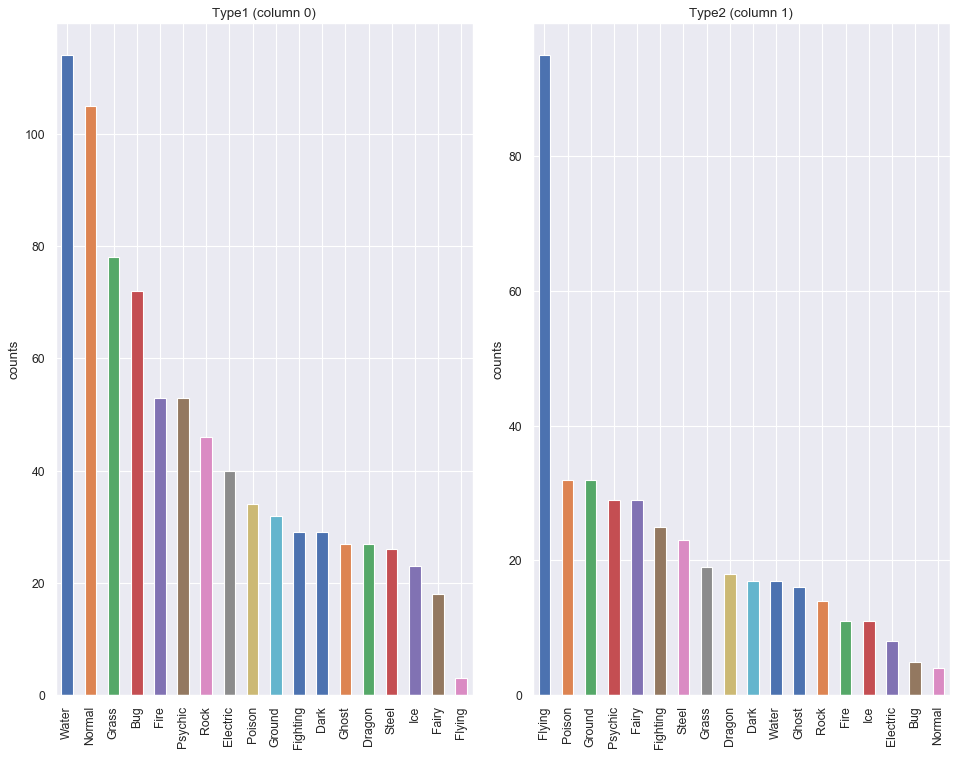

In [12]:
plotPerColumnDistribution(df, 10, 5)

In [44]:
df.head(2)

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison


In [56]:
boo = []
for filename in listdir('images'):
    boo.append([filename.split('/'[0]), str(filename[:-4])])
    
df_poke = pd.DataFrame(boo, columns=['filename', 'critter name'])

In [57]:
df_poke.head()

,filename,critter name
0,[parasect.png],parasect
1,[lumineon.png],lumineon
2,[raikou.png],raikou
3,[comfey.jpg],comfey
4,[dedenne.png],dedenne


In [82]:
print(len(df_poke))
print(len(df))

897
809


In [98]:
df_poke.loc[3, ['filename', 'critter name']]

filename        [comfey.jpg]
critter name          comfey
Name: 3, dtype: object

In [99]:
df_poke['critter name'][0]

'parasect'

In [101]:
df['Type1'][0]

'Grass'

In [140]:
df_poke = df_poke.drop(columns='type')

In [141]:
df_poke['type'] = ''

In [143]:
df_poke.head(2)

,filename,critter name,type
0,[parasect.png],parasect,
1,[lumineon.png],lumineon,


In [145]:
copy = df_poke
line = 0
counter = 0
while line < (len(copy)):
    while counter < (len(df)):
        if copy['critter name'][line] == df['Name'][counter]:
            copy.loc[line, ['type']] = df.loc[counter, ['Type1']].values[0]
#             copy.insert(2, 'type', df['Type1'][counter])
            counter = 0 #reset counter
            line += 1
        else:
            counter += 1
            line += 1

KeyboardInterrupt: 

In [ ]:
copy

In [61]:
pokemon_data = list()
for filename in listdir('images'):
    img_data = image.imread('images/' + filename)
    pokemon_data.append(img_data)
    print('> loaded %s %s' % (filename, img_data.shape))
    
# https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/

> loaded parasect.png (120, 120, 4)
> loaded lumineon.png (120, 120, 4)
> loaded raikou.png (120, 120, 4)
> loaded comfey.jpg (120, 120, 3)
> loaded dedenne.png (120, 120, 4)
> loaded pyroar.png (120, 120, 4)
> loaded articuno.png (120, 120, 4)
> loaded magmortar.png (120, 120, 4)
> loaded bulbasaur.png (120, 120, 4)
> loaded banette.png (120, 120, 4)
> loaded staraptor.png (120, 120, 4)
> loaded pidove.png (120, 120, 4)
> loaded comfey.png (120, 120, 3)
> loaded taillow.png (120, 120, 4)
> loaded charizard.png (120, 120, 4)
> loaded infernape.png (120, 120, 4)
> loaded sandshrew.png (120, 120, 4)
> loaded marshadow.png (120, 120, 3)
> loaded alakazam.png (120, 120, 4)
> loaded lickitung.png (120, 120, 4)
> loaded starmie.png (120, 120, 4)
> loaded yanmega.png (120, 120, 4)
> loaded yveltal.png (120, 120, 4)
> loaded zigzagoon.png (120, 120, 4)
> loaded thundurus-incarnate.png (120, 120, 4)
> loaded petilil.png (120, 120, 4)
> loaded torterra.png (120, 120, 4)
> loaded purugly.png (120

> loaded primeape.png (120, 120, 4)
> loaded vanillish.png (120, 120, 4)
> loaded probopass.png (120, 120, 4)
> loaded skiploom.png (120, 120, 4)
> loaded chesnaught.png (120, 120, 4)
> loaded kyurem.png (120, 120, 4)
> loaded melmetal.jpg (120, 120, 3)
> loaded shiinotic.jpg (120, 120, 3)
> loaded popplio.jpg (120, 120, 3)
> loaded carnivine.png (120, 120, 4)
> loaded torracat.png (120, 120, 3)
> loaded gardevoir.png (120, 120, 4)
> loaded pinsir.png (120, 120, 4)
> loaded snorunt.png (120, 120, 4)
> loaded samurott.png (120, 120, 4)
> loaded necrozma.png (120, 120, 3)
> loaded smeargle.png (120, 120, 4)
> loaded necrozma.jpg (120, 120, 3)
> loaded magby.png (120, 120, 4)
> loaded ursaring.png (120, 120, 4)
> loaded crabrawler.png (120, 120, 3)
> loaded haxorus.png (120, 120, 4)
> loaded oranguru.jpg (120, 120, 3)
> loaded geodude.png (120, 120, 4)
> loaded foongus.png (120, 120, 4)
> loaded hippowdon.png (120, 120, 4)
> loaded delibird.png (120, 120, 4)
> loaded oranguru.png (120, 12

> loaded buzzwole.jpg (120, 120, 3)
> loaded seismitoad.png (120, 120, 4)
> loaded simipour.png (120, 120, 4)
> loaded vanilluxe.png (120, 120, 4)
> loaded cubchoo.png (120, 120, 4)
> loaded tapu-lele.jpg (120, 120, 3)
> loaded mantine.png (120, 120, 4)
> loaded dartrix.png (120, 120, 3)
> loaded weezing.png (120, 120, 4)
> loaded dhelmise.jpg (120, 120, 3)
> loaded corsola.png (120, 120, 4)
> loaded roserade.png (120, 120, 4)
> loaded carbink.png (120, 120, 4)
> loaded heliolisk.png (120, 120, 4)
> loaded omanyte.png (120, 120, 4)
> loaded rufflet.png (120, 120, 4)
> loaded mothim.png (120, 120, 4)
> loaded klinklang.png (120, 120, 4)
> loaded sliggoo.png (120, 120, 4)
> loaded raticate.png (120, 120, 4)
> loaded dhelmise.png (120, 120, 3)
> loaded dartrix.jpg (120, 120, 3)
> loaded vibrava.png (120, 120, 4)
> loaded shiftry.png (120, 120, 4)
> loaded swampert.png (120, 120, 4)
> loaded excadrill.png (120, 120, 4)
> loaded morelull.png (120, 120, 3)
> loaded chatot.png (120, 120, 4)
>